<a href="https://colab.research.google.com/github/Soni-20/BACTERIAL-IMAGE-CLASSIFICATION/blob/main/resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers

In [ ]:
from tensorflow.keras.applications import resnet50


In [ ]:
main_folder="/content/drive/MyDrive/REMAIN-BACT/"
class_names=os.listdir(main_folder)
print(class_names)

['ACINETOBACTER', 'Bacteroides.fragilis', 'Bifidobacterium.spp', 'Candida.albicans', 'Clostridium.perfringens', 'Enterococcus.faecalis', 'Enterococcus.faecium', 'Escherichia.coli', 'Fusobacterium', 'Lactobacillus.casei', 'Lactobacillus.crispatus', 'Lactobacillus.delbrueckii', 'Lactobacillus.gasseri', 'Lactobacillus.jehnsenii', 'Lactobacillus.johnsonii', 'Lactobacillus.paracasei', 'Lactobacillus.plantarum', 'Lactobacillus.reuteri', 'Micrococcus_spp', 'Neisseria_gonorrhoeae', 'Porfyromonas_gingivalis', 'Pseudomonas_aeruginosa', 'Propionibacterium_acnes', 'Proteus', 'Staphylococcus_aureus', 'Staphylococcus_saprophiticus', 'Staphylococcus_epidermidis', 'Veionella', 'Streptococcus.agalactiae']


In [ ]:
validation_folder="/content/drive/MyDrive/REMAIN-BACT/"
val_class_names=os.listdir(validation_folder)
print(val_class_names)

['ACINETOBACTER', 'Bacteroides.fragilis', 'Bifidobacterium.spp', 'Candida.albicans', 'Clostridium.perfringens', 'Enterococcus.faecalis', 'Enterococcus.faecium', 'Escherichia.coli', 'Fusobacterium', 'Lactobacillus.casei', 'Lactobacillus.crispatus', 'Lactobacillus.delbrueckii', 'Lactobacillus.gasseri', 'Lactobacillus.jehnsenii', 'Lactobacillus.johnsonii', 'Lactobacillus.paracasei', 'Lactobacillus.plantarum', 'Lactobacillus.reuteri', 'Micrococcus_spp', 'Neisseria_gonorrhoeae', 'Porfyromonas_gingivalis', 'Pseudomonas_aeruginosa', 'Propionibacterium_acnes', 'Proteus', 'Staphylococcus_aureus', 'Staphylococcus_saprophiticus', 'Staphylococcus_epidermidis', 'Veionella', 'Streptococcus.agalactiae']


In [ ]:
x=[] # to store array value of the images
y=[] # to store the labels of the images



In [ ]:
import os
for folder in os.listdir(main_folder):
    image_list=os.listdir(main_folder+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(main_folder+"/"+folder+"/"+img_name,target_size=(100,100))
        
        # Converting to arrary
        img=image.img_to_array(img)
        
        # Transfer Learning: this is to apply preprocess of resnet to our images before passing it to resnet
        img=resnet50.preprocess_input(img) #  Optional step
        
        # Appending the arrarys
        x.append(img) # appending image array
        y.append(class_names.index(folder)) # appending class index to the array
        
        
print("Preparing Training Dataset Completed.")

Preparing Training Dataset Completed.


In [ ]:
val_images=[]
val_image_label=[] # to store the labels of the images

for folder in os.listdir(validation_folder):
    image_list=os.listdir(validation_folder+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(validation_folder+"/"+folder+"/"+img_name,target_size=(100,100))
        
        # Converting to arrarys
        img=image.img_to_array(img)

        # Transfer Learning: this is to apply preprocess of resnet to our images before passing it to resnet
        img=resnet50.preprocess_input(img) #  Optional step
        
        # Appending arrays
        val_images.append(img) # appending image array
        val_image_label.append(val_class_names.index(folder))
        
print("Preparing Validation Dataset Completed.")

Preparing Validation Dataset Completed.


In [ ]:
# Verifying the output

# Training Dataset
print("Training Dataset")

x=np.array(x) # Converting to np arrary to pass to the model
print(x.shape)

y=to_categorical(y) # onehot encoding of the labels
# print(y)
print(y.shape)




Training Dataset
(575, 100, 100, 3)
(575, 29)


In [ ]:
# Check properties of the model that we are going to use for Transfer Learning

print("Summary of default ResNet50 model.\n")

# we are using resnet50 for transfer learnin here. So we have imported it
from tensorflow.keras.applications import resnet50

# initializing model with weights='imagenet'i.e. we are carring its original weights
model_resnet=resnet50.ResNet50(weights='imagenet')

# display the summary to see the properties of the model
model_resnet.summary()

Summary of default ResNet50 model.

102967424/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                      

In [ ]:
# Modelling WITH Transfer Learning

# Here we will prepare model as per our requirements

print("Summary of Custom ResNet50 model.\n")
print("1) We setup input layer and 2) We removed top (last) layer. \n")

# let us prepare our input_layer to pass our image size. default is (224,224,3). we will change it to (100,100,3)
input_layer=layers.Input(shape=(100,100,3))

# initialize the transfer model ResNet50 with appropriate properties per our need.
# we are passing paramers as following
# 1) weights='imagenet' - Using this we are carring weights as of original weights.
# 2) input_tensor to pass the ResNet50 using input_tensor
# 3) we want to change the last layer so we are not including top layer
resnet_model=resnet50.ResNet50(weights='imagenet',input_tensor=input_layer,include_top=False)

# See the summary of the model with our properties.
resnet_model.summary()

Summary of Custom ResNet50 model.

1) We setup input layer and 2) We removed top (last) layer. 

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                            

In [ ]:
# access the current last layer of the model and add flatten and dense after it

print("Summary of Custom ResNet50 model.\n")
print("1) We flatten the last layer and added 1 Dense layer and 1 output layer.\n")

last_layer=resnet_model.output # we are taking last layer of the model

# Add flatten layer: we are extending Neural Network by adding flattn layer
flatten=layers.Flatten()(last_layer) 

# Add dense layer
# dense1=layers.Dense(100,activation='relu')(flatten)

# Add dense layer to the final output layer
output_layer=layers.Dense(29,activation='softmax')(flatten)

# Creating modle with input and output layer
model=models.Model(inputs=input_layer,outputs=output_layer)

# Summarize the model
model.summary()

Summary of Custom ResNet50 model.

1) We flatten the last layer and added 1 Dense layer and 1 output layer.

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                    

In [ ]:
# we will freez all the layers except the last layer

# we are making all the layers intrainable except the last layer
print("We are making all the layers intrainable except the last layer. \n")
for layer in model.layers[:-1]:
    layer.trainable=False
model.summary()

We are making all the layers intrainable except the last layer. 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalizatio

In [ ]:
# Train the Model

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.5,random_state=5)
# print(xtrain)
# print(xtest)
# print(ytrain)
# print(ytest)

print("Splitting data for train and test completed.")

Splitting data for train and test completed.


In [ ]:
# Compiling Model

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print("Model compilation completed.")

Model compilation completed.


In [ ]:
# Fit the Model

model.fit(xtrain,ytrain,epochs=10,batch_size=64,verbose=True,validation_data=(xtest,ytest))

print("Fitting the model completed.")

Epoch 1/10
5/5 [==============================] - 42s 8s/step - loss: 4.8971 - accuracy: 0.2787 - val_loss: 4.5144 - val_accuracy: 0.4757
Epoch 2/10
5/5 [==============================] - 34s 8s/step - loss: 1.9326 - accuracy: 0.6969 - val_loss: 3.2208 - val_accuracy: 0.4861
Epoch 3/10
5/5 [==============================] - 34s 8s/step - loss: 0.5027 - accuracy: 0.8955 - val_loss: 3.2392 - val_accuracy: 0.5278
Epoch 4/10
5/5 [==============================] - 34s 8s/step - loss: 0.4450 - accuracy: 0.9059 - val_loss: 2.3782 - val_accuracy: 0.6215
Epoch 5/10
5/5 [==============================] - 34s 8s/step - loss: 0.0523 - accuracy: 0.9756 - val_loss: 2.4636 - val_accuracy: 0.6250
Epoch 6/10
5/5 [==============================] - 25s 6s/step - loss: 0.0349 - accuracy: 0.9895 - val_loss: 2.7600 - val_accuracy: 0.6111
Epoch 7/10
5/5 [==============================] - 34s 7s/step - loss: 0.0159 - accuracy: 0.9965 - val_loss: 2.2582 - val_accuracy: 0.6528
Epoch 8/10
5/5 [==================

In [ ]:
# This function helps to predict individual image supplied to it
def predict(img_name):
    img=image.load_img(img_name,target_size=(100,100))
    img=image.img_to_array(img)
    plt.imshow(img.astype('int32'))
    plt.show()
    img=resnet50.preprocess_input(img)
    prediction=model.predict(img.reshape(1,100,100,3))
    output=np.argmax(prediction)
    print(class_names[output])


In [ ]:
# This function plots the image supplied in array
def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
#     plt.imshow(img) # showing b/w image
    plt.imshow(img.astype('int32'))
    
    print(predictions_array)
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

#     print(predicted_label)
#     print(true_label)

    if predicted_label == true_label: #setting up label color
        color='green' # correct then blue colour
    else:
        color='red' # wrong then red colour
    plt.xlabel("{} {:2.0f}% ({})".format(val_class_names[predicted_label], 100*np.max(predictions_array), val_class_names[true_label]), color=color)

# This function plots bar chart supplied in the array data
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)
#     print(predicted_label)
#     print(true_label)
    if predicted_label == 0:
      predicted_label=1
    if true_label == 0:
      true_label=1
    
    thisplot=plt.bar(range(10), predicted_label, color='seashell')
    plt.ylim([0,1])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

In [ ]:
x1=np.array(xtrain)
y1=np.array(ytrain)

In [ ]:
print(x1.shape)
print(y1.shape)

In [ ]:
# This function helps to predict individual image supplied to it
def predict(img_name):
    img=image.load_img(img_name,target_size=(100,100))
    img=image.img_to_array(img)
    plt.imshow(img.astype('int32'))
    plt.show()
    img=resnet50.preprocess_input(img)
    prediction=model.predict(img.reshape(1,100,100,3))
    output=np.argmax(prediction)
    print(class_names[output])

# This function plots the image supplied in array
def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
#     plt.imshow(img) # showing b/w image
    plt.imshow(img.astype('int32'))
    
#     print(*predictions_array)
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)


#     print(predicted_label)
#     print(true_label)

    if predicted_label == true_label: #setting up label color
        color='green' # correct then blue colour
    else:
        color='red' # wrong then red colour
    plt.xlabel("{} {:2.0f}% ({})".format(val_class_names[predicted_label], 100*np.max(predictions_array), val_class_names[true_label]), color=color)

# This function plots bar chart supplied in the array data
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)
#     print(predicted_label)
#     print(true_label)
    if predicted_label == 0:
        predicted_label=1
    if true_label == 0:
        true_label=1
    
    thisplot=plt.bar(range(10), predicted_label, color='seashell')
    plt.ylim([0,1])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

In [ ]:
# Preparing prediction arrary
predictions=[]

for img in x:
    img=img.reshape(1,100,100,3)
    predictions.append(model.predict(img))

1/1 [==============================] - 0s 139ms/step


In [ ]:
main_folder="/content/drive/MyDrive/TEST/"
class_names=os.listdir(main_folder)
print(class_names)


In [ ]:
predictions=[]

for img in val_images:
    img=img.reshape(1,100,100,3)
    predictions.append(model.predict(img))

1/1 [==============================] - 0s 136ms/step


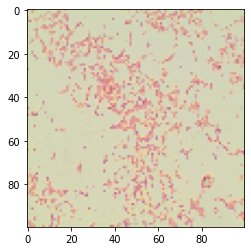

1/1 [==============================] - 0s 146ms/step
ACINETOBACTER


In [ ]:
predict('/content/drive/MyDrive/TEST/Acinetobacter.baumanii_0001 (1).jpg')

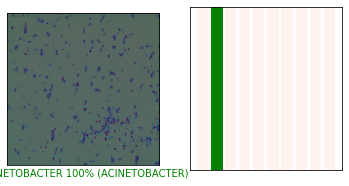

In [ ]:
# defining parameters to pass to function
i=22 # image number 12. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

plot_image(i,predictions, val_image_label, val_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, val_image_label)
plt.show()